In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import time
import os
import cv2
import tensorflow as tf
import matplotlib.image as mpimg
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_olivetti_faces
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score
from skimage.transform import resize
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from skimage.color import rgb2gray
from tqdm.notebook import tqdm
from mpl_toolkits.mplot3d import Axes3D
from tensorflow.keras import layers, models
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

gpus = tf.config.experimental.list_physical_devices('GPU') #with import tensorflow
tf.config.experimental.set_memory_growth(gpus[0], True) # me too



/tmp/ipykernel_56527/3795836286.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
2024-02-27 13:51:25.856960: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-27 13:51:25.911730: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-27 13:51

In [2]:
model = VGG16(weights="imagenet")


2024-02-27 13:51:28.055172: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-27 13:51:28.055573: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-27 13:51:28.055706: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

553467096/553467096 [==============================] - 18s 0us/step


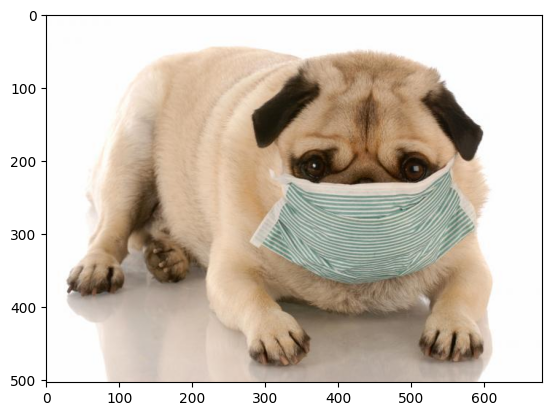

In [3]:
image = cv2.imread("../cv_data/dog.jpg")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [4]:
image = cv2.resize(image,dsize=(224,224))
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)

In [5]:
yhat =model.predict(image)
label = decode_predictions(yhat)
label = label[0][0]
print(label[1], label[2]*100)

2024-02-27 13:54:48.889271: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8905


35363/35363 [==============================] - 0s 0us/step
pug 67.22829341888428


In [6]:
decode_predictions(yhat)

[[('n02110958', 'pug', 0.67228293),
  ('n03803284', 'muzzle', 0.29503044),
  ('n02099712', 'Labrador_retriever', 0.0045772316),
  ('n04229816', 'ski_mask', 0.0030468176),
  ('n02112706', 'Brabancon_griffon', 0.002856663)]]

In [7]:
path = "../cv_data/PetImages/"
labels = []
file_id = []
full_names = []
lables = os.listdir(path)
for label in lables:
    img_names = os.listdir(path+ "/" +label)
    for name in img_names:
        labels.append(label)
        file_id.append(name)
        full_names.append(label + "/" + name)


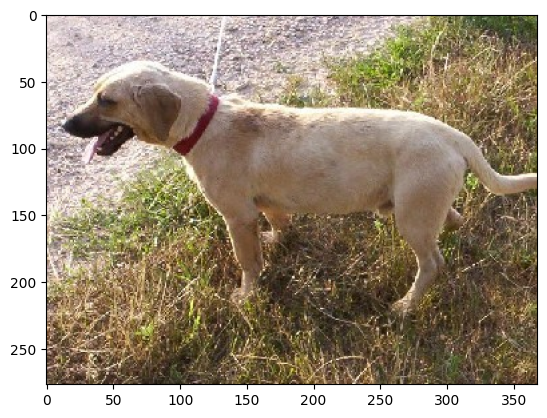

In [8]:
image = mpimg.imread(path + full_names[0])
plt.imshow(image)
plt.show()

In [9]:
def resize_and_preprocess_vgg(image):
    image = cv2.resize(image, dsize=(224, 224))
    image = img_to_array(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    return preprocess_input(image)

In [10]:
def predict_vgg(model, image):
    yhat = model.predict(image)
    label = decode_predictions(yhat)
    return label[0][0][1]

1/1 [==============================] - 0s 42ms/step


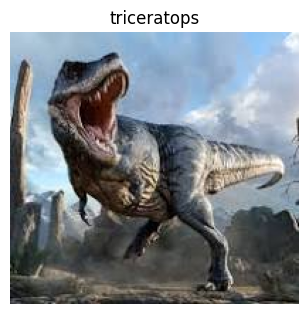

In [17]:
plt.figure(figsize=(14,12))
idx = 1


image = mpimg.imread("../cv_data/lol2.jpeg")
plt.subplot(3,2,idx)
idx+=1
plt.imshow(image)

image = resize_and_preprocess_vgg(image)
result = predict_vgg(model, image)

plt.title(result)
plt.axis("off")

plt.show()

1/1 [==============================] - 0s 14ms/step


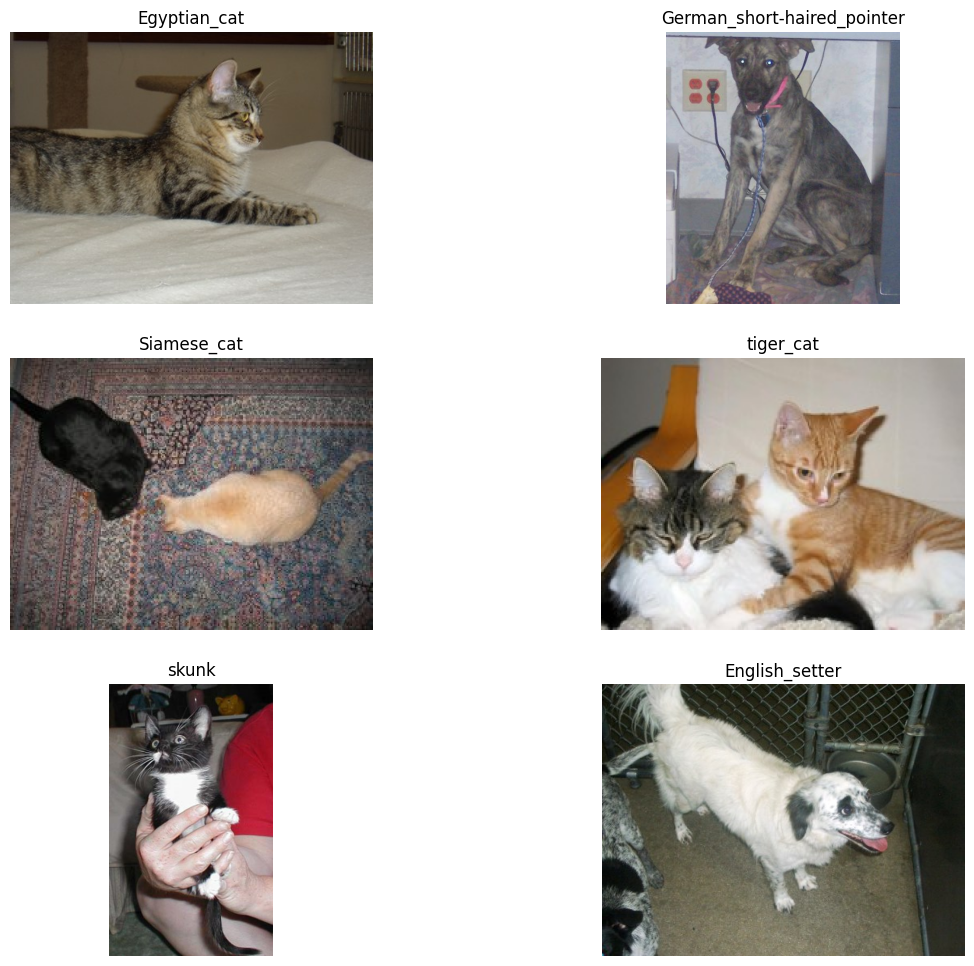

In [12]:
plt.figure(figsize=(14,12))
idx = 1

for each in random.choices(full_names, k=6):
    image = mpimg.imread(path + each)
    plt.subplot(3,2,idx)
    idx+=1
    plt.imshow(image)

    image = resize_and_preprocess_vgg(image)
    result = predict_vgg(model, image)

    plt.title(result)
    plt.axis("off")

plt.show()